In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Import the data from medical_examination.csv and assign it to the df variable.
df = pd.read_csv('medical_examination.csv')

In [3]:
# Add an overweight column to the data. To determine if a person is overweight, first calculate their BMI by dividing their weight in kilograms by the square of their height in meters. If that value is > 25 then the person is overweight. Use the value 0 for NOT overweight and the value 1 for overweight.
df['overweight'] = ((df['weight'] / ((df['height'] / 100) ** 2) > 25) * 1)

In [4]:
# Normalize data by making 0 always good and 1 always bad. If the value of cholesterol or gluc is 1, set the value to 0. If the value is more than 1, set the value to 1.
df['cholesterol'] = df['cholesterol'].replace({1: 0, 2: 1, 3: 1})
df['gluc'] = df['gluc'].replace({1: 0, 2: 1, 3: 1})

In [5]:
# Draw a categorical bar plot using the draw_cat_plot function.
def draw_cat_plot():
    # Create a DataFrame for the cat plot using pd.melt with values from cholesterol, gluc, smoke, alco, active, and overweight in the df_cat variable.
    df_cat = pd.melt(df, id_vars =['cardio'], value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])


    # Group and reformat the data in df_cat to split it by cardio. Show the counts of each feature.
    df_cat = df_cat.groupby(['cardio']).value_counts().reset_index()
    

    # Create a chart that shows the value counts of the categorical features using the following method provided by the seaborn library import: sns.catplot().
    fig = sns.catplot(data = df_cat, x = 'variable', y = 'count', hue = 'value', kind = 'bar', col = 'cardio', order = ['active', 'alco', 'cholesterol', 'gluc', 'overweight', 'smoke'])


    # 9 Do not modify the next two lines.
    fig.savefig('catplot.png')
    return fig

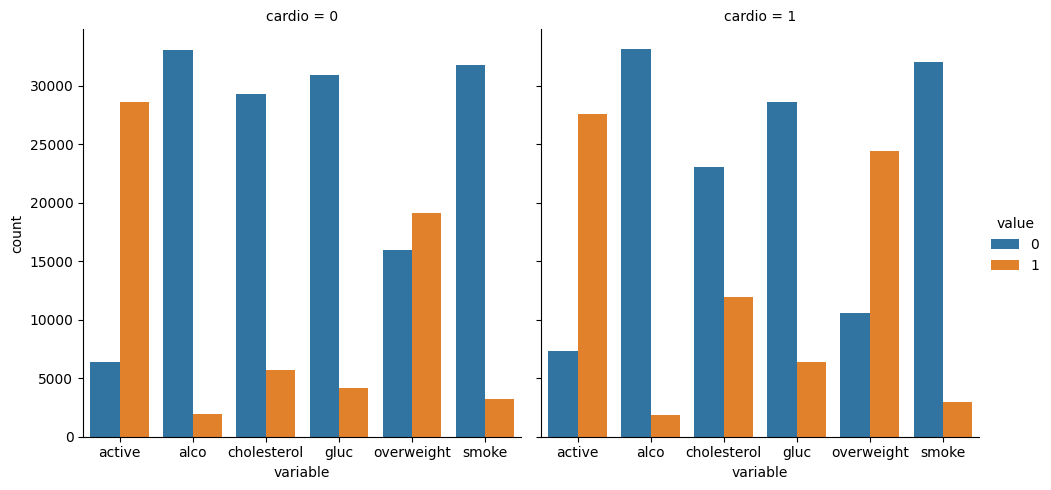

In [6]:
draw_cat_plot()

In [7]:
# Draw a heat map based on the correlation matrix for the data set
def draw_heat_map():
    # Clean the data by filtering out the following patient segments that represent incorrect data:
        # diastolic pressure is higher than systolic 
        # height is less than the 2.5th percentile 
        # height is more than the 97.5th percentile
        # weight is less than the 2.5th percentile
        # weight is more than the 97.5th percentile

    df_heat = df[
        (df['ap_lo'] <= df['ap_hi']) & 
        (df['height'] >= df['height'].quantile(0.025)) & 
        (df['height'] <= df['height'].quantile(0.975)) & 
        (df['weight'] >= df['weight'].quantile(0.025)) & 
        (df['weight'] <= df['weight'].quantile(0.975))
    ]

    # Calculate the correlation matrix and store it in the corr variable.
    corr = df_heat.corr()

    # Generate a mask for the upper triangle and store it in the mask variable.
    mask = np.triu(corr)

    # Set up the matplotlib figure.
    fig, ax = plt.subplots(figsize = (12, 12))

    # Plot the correlation matrix using the method provided by the seaborn library import: sns.heatmap().
    sns.heatmap(corr, mask=mask, fmt='.1f', annot = True, square = True, linewidths = 1, center = 0.03, vmax = 0.3, vmin = -0.1)

    fig.savefig('heatmap.png')
    return fig

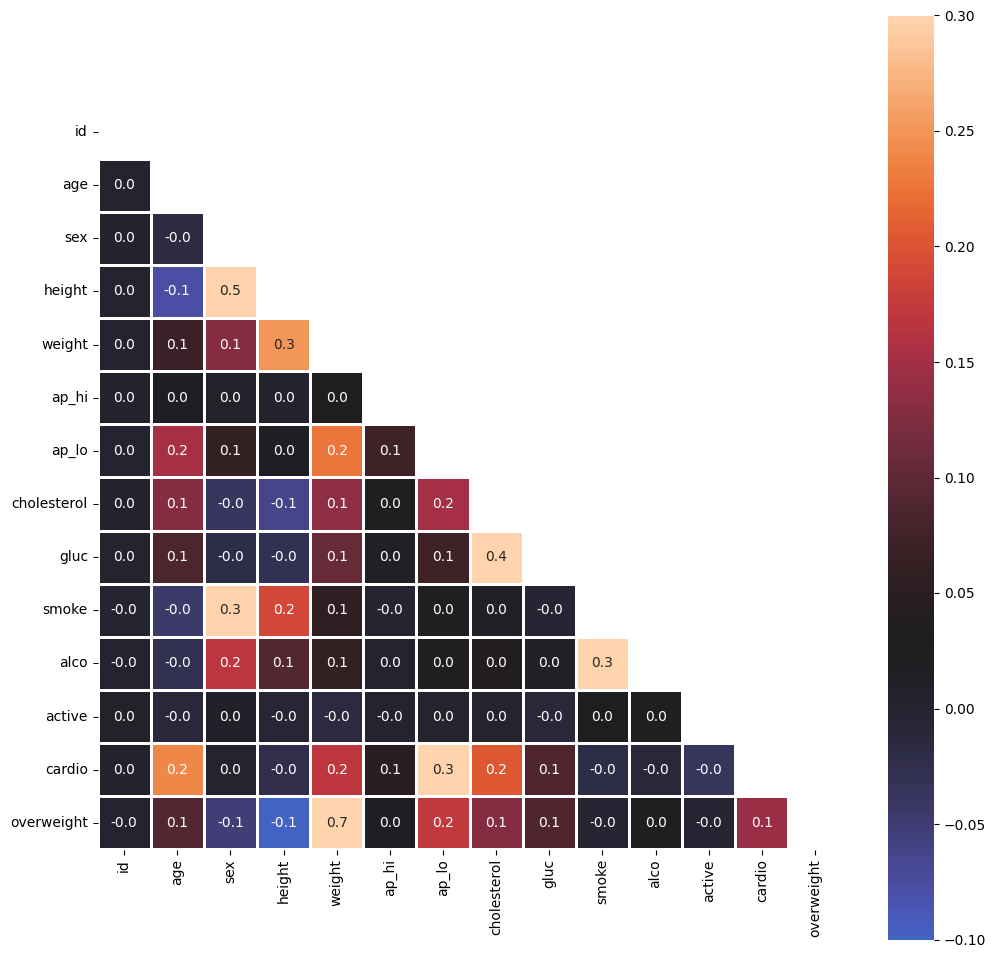

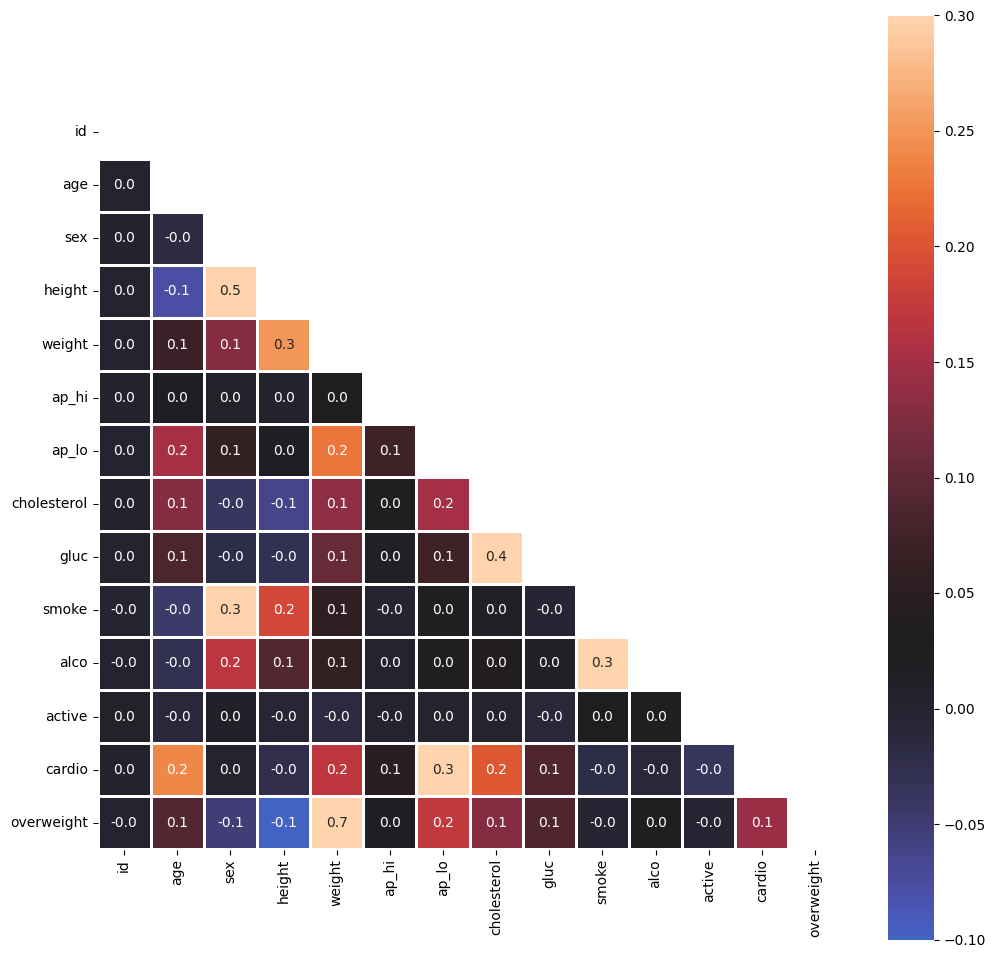

In [8]:
draw_heat_map()